In [1]:
import MinMax2 as mm
import os
import time

## General Methods to Calculate Minimum Removal Sets
The functions presented here can be found in the MinMax2 module and are meant to answer the following:

For a given graph $G$, what is the minimum number of-
- vertex removals, such that $\chi(G)\leq k$
- edge removals such that $\chi(G)\leq k$
- vertex removals, such that $\lambda(G)\leq k$
- edge removals, such that $\lambda(G)\leq k$

This is symbolical written as $\Omega_{\omega}^k(G)$, where $\Omega$ designates $\lambda$ or $\chi$. And $\omega$ designates $v$(vertex removals) or $e$(edge removals).

There are a few ways to calculate these 4 values,

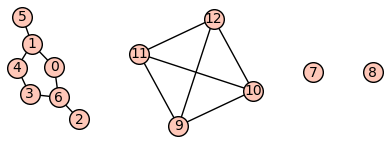

In [2]:
#make a graph using an edge dict
E = {
    2:[6],
    6:[0,3],
    0:[1],
    3:[4],
    1:[0,4],
    5:[1],
    7:[],
    8:[],
    9:[10,11],
    11:[10],
    12:[11,9,10]
}
#example graph
H = Graph(E)
show(H)

All functions that calculate $\Omega_\omega^k(G)$ have a common argument, ```Sym``` that designates that designates $\Omega$ by either being "Lmb" or "Chi", an argument ```Typ``` that specifies $\omega$ by either being "V" or "E", aswell as an argument ```k```.

In [3]:
#here I want to find how many vertex removals it takes to get this graph under chromatic number of 2
Sym = 'Chi'
Typ= 'V'
K = 2

MinMax() Directly calculates the minimum removal set for a given graph in the obvious way. It has to know the graph $G$ and the keyword arguments ```Sym```, ```Type```, ```k```.

In [4]:
#the most straight forward and basic method is to use MinMax()
num = mm.MinMax(H,sym=Sym,typ=Typ,k=K)
print(f"To get H into failstate of {Sym}<{K} I need to remove {num} {Typ}'s")

To get H into failstate of Chi<2 I need to remove 3 V's


In [5]:
#This tends to be slow when dealing with multiple components and singletons so there are alternatives

#MinMaxComp() broadcast the MinMax() on all connected components and returns the sum
num = mm.MinMaxComp(H)
print(f"To get H into failstate of {Sym}<{K} I need to remove {num} {Typ}'s")

To get H into failstate of Chi<2 I need to remove 3 V's


## Precomputing Parameters for Graph Components
After some time I found it convenient to pre-compute some values and sets to speed things up. There are 2 main things that are good to pre-compute
- The $G(n,m)$ sets, by default sage makes a generator that takes some time to generate all the graphs with $n$ vertices and $m$ edges.
- Parameters on all possible connected components $H$ with $\text{Ord}(H)\leq n$ for some $n$

This way we can pre-compute $\Omega_omega^k(H)$ for the connected components of $G$ then add them up to get $\Omega_omega^k(G)$. This way the stopgap after pre-computation is identifying the connected components and fetching their values.

We have to compute the $G(n,m)$ sets first since they act as a way of retrieving all possible connected components.

We can compute all $G(n,m)$ sets by specifying a maximum $n$. The function `GetGG(n)`, makes a dictionary $D[n][m]\rightarrow G(n,m)$ (Also has optional multithreading options using the `Multi` keyword argument).

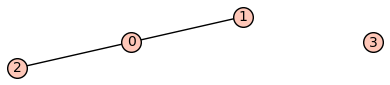

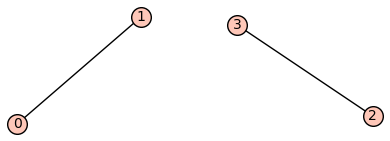

In [6]:
#to just get a map Dict[n][m] => Gnm list use GetGG(n), theres also multithreading options
GG4 = mm.GetGG(4,Multi=False,threads=2)
for i in GG4[4][2]:
    show(i)

This just calculates the $G(n,m)$ sets. I personally found that I would need to run this on large systems, then use the dictionary on a personal machine. To calculate the dictionary and pickle it to a directory in a single line run `GenGG`, this makes the dictionary, and pickles it to the file "GG_n#.pkl", where the '#' designates the largest n (I call this a GG file).

In [7]:
#GenGG() pickles a file with the Gnm data aswell as runtime info
#the argument are the same as GetGG()
path = os.getcwd()+"/SampleData"
mm.GenGG(4,dirs=path)

Saving to file: /home/rod/Dev/PersonalProjects/NatesNetworks/SampleData/GG_n4.pkl


Note that there are helper functions `FindGG` to get the name of the biggest (in terms of n) GG file in a directory and `LoadGG` which does the same thing but actually un-pickles the file to a variable.

In [8]:
mm.FindGG(dirs=path)

'GG_n4.pkl'

In [9]:
GG4 = mm.LoadGG(dirs=path)
GG4

{'runtime(sec)': 0.02342712199606467,
 'Data': {1: {0: [Graph on 1 vertex]},
  2: {0: [Graph on 2 vertices], 1: [Graph on 2 vertices]},
  3: {0: [Graph on 3 vertices],
   1: [Graph on 3 vertices],
   2: [Graph on 3 vertices],
   3: [Graph on 3 vertices]},
  4: {0: [Graph on 4 vertices],
   1: [Graph on 4 vertices],
   2: [Graph on 4 vertices, Graph on 4 vertices],
   3: [Graph on 4 vertices, Graph on 4 vertices, Graph on 4 vertices],
   4: [Graph on 4 vertices, Graph on 4 vertices],
   5: [Graph on 4 vertices],
   6: [Graph on 4 vertices]}}}

Now that there is a GG file in a directory, I compute the parameters on all connected components found in all these Gnm sets. This is done by using the `CompLibSingleK` function which generates $D[n][m][H]\rightarrow \Omega_\omega^k(H)$


In [10]:
#this function is CompLibSingleK() it needs the paramater specified (largest n, type of coloring, vertex/edge removals,
# what k to use, and the path of the GG file)
Sym = 'Chi'
Typ = 'V'
K = 2

CompLib = mm.CompLibSingleK(4,sym=Sym,typ=Typ,k=K,dirs=path,prints=True)

Found GG file: GG_n4.pkl
0.0021049700008006766 Seconds to compute all Chi_V^2 for components up to n=4


In [11]:
#Note that the reason n has to be passed is because CompLib will try to generate any Gnm sets not
#found in the detected GG file
CompLib = mm.CompLibSingleK(5,sym=Sym,typ=Typ,k=K,dirs=path)

Found GG file does not contain the set G(5,0)
Will start to generate one now
Done Generating G(5,0)
Found GG file does not contain the set G(5,1)
Will start to generate one now
Done Generating G(5,1)
Found GG file does not contain the set G(5,2)
Will start to generate one now
Done Generating G(5,2)
Found GG file does not contain the set G(5,3)
Will start to generate one now
Done Generating G(5,3)
Found GG file does not contain the set G(5,4)
Will start to generate one now
Done Generating G(5,4)
Found GG file does not contain the set G(5,5)
Will start to generate one now
Done Generating G(5,5)
Found GG file does not contain the set G(5,6)
Will start to generate one now
Done Generating G(5,6)
Found GG file does not contain the set G(5,7)
Will start to generate one now
Done Generating G(5,7)
Found GG file does not contain the set G(5,8)
Will start to generate one now
Done Generating G(5,8)
Found GG file does not contain the set G(5,9)
Will start to generate one now
Done Generating G(5,9)


Any issues with isomorphism double counting are already taken care of so each H should be unique. `CompLibSingleK` only runs the computation for a single $k$, to use multiple Ks use `GetCompLib`. This can also be multithreaded, each core working on a single $k$,

In [12]:
# GetCompLib needs a list or range of Ks to use
CompLib = mm.GetCompLib(np=4,sym=Sym,typ=Typ,ks=[2,3],dirs=path,prints=True)
#CompLib = mm.GetCompLib(np=4,sym=Sym,typ=Typ,ks=[2,3],dirs=path,multi=True,threads=2)

Found GG file: GG_n4.pkl
Edge 0 completed
Edge 1 completed
Edge 2 completed
Edge 3 completed
Edge 4 completed
Edge 5 completed
Edge 6 completed
0.0023276870051631704 Seconds to compute all Chi_V^2 for components up to n=4
K=2 Finished
Found GG file: GG_n4.pkl
Edge 0 completed
Edge 1 completed
Edge 2 completed
Edge 3 completed
Edge 4 completed
Edge 5 completed
Edge 6 completed
0.001784022999345325 Seconds to compute all Chi_V^3 for components up to n=4
K=3 Finished


This is also useful to save to file. `GenCompLib` pickles the output of `GetCompLib` along with the $k$'s used and some runtime info. Saves it as "CompLib_n#_#Sym_#Type_K##.pkl", where "#Sym" specifies chromatic index or number, "#Type" specifies vertex or edge removals, and "K##" specifies the range of K's used. This file I call a 'CompLib' file.

In [13]:
#Similar to the GenGG() auto pickling GG data ina nice ditc, GenCompLib() packages CompLib data
#into a nice dictionary with some data
mm.GenCompLib(np=4,sym=Sym,typ=Typ,ks=[2,3,4],dirs=path)

Saving to file: /home/rod/Dev/PersonalProjects/NatesNetworks/SampleData/CompLib_n4_Chi_V_k2-4.pkl


And we have a `FindCompLib` function to fine the largest CompLib file (in terms of $n$) and a `LoadCompLib` file to un-pickle a CompLib file.

In [14]:
#there is also a FindCompLib() to find the name of largest CompLib and LoadCompLib() to load
#the largest CompLib file
CompLibFile = mm.LoadCompLib(sym='Chi',typ='V',dirs=path)
print(CompLibFile.keys())
CompLib = CompLibFile['Data']

dict_keys(['runtime(sec)', 'Data', 'K'])


Now that a CompLib file is constructed, it can be used to calculate $\Omega_\omega^k(G)$ by looking up the components. This is done by the `MinMaxLookUp` function, that expects the graph and a map $D[n][m][H]\rightarrow \Omega_\omega^k(H)$. Note this mapping is one level down from a normal CompLib file.

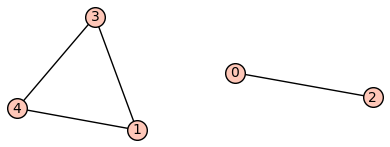

1

In [17]:
#CompLib stores
# Dict[k][n][m][H] => Sym_#^k(H) for each connected component H with n vertices and m edges
#because of the way CompLib is made CompLib[2] is associated with vertex removals to get Chi under 2

#example graph
E = {
    4:[3,1],
    3:[1],
    0:[2]
}
H = Graph(E)
show(H)

#use the lookup method to caluclate MinMax
mm.MinMaxLookUp(H,CompLib[2])

# Experimental Features

Note the multithreading options presented above, work by passing a whole set of graphs onto a core for calculation. Sometimes when a set has large graphs, a core has to handle them sequentially while the other cores relax. Even more gains can be made by divvying up individual graphs instead of sets, this is done by the function `GenCompLibExp`. I find for $n\geq 6$ this results in some nice gains. For $n\leq 3$ I find that this method takes longer, since it actually takes more time to send the graphs to the cores that it would to send a list of graphs.

In [16]:
#I dont want to include any multithreading functions here so ill comment it out
#GetCompLibExp(2)